# Quest for Kuznet's Curve

Since the global warming and the environment became such a hot topic, many of the scientists started to analyze this issue and tried to look for solutions. Many believed that finding relation between economy and environment, may help in setting right policies and direct the correct regulations, that would enable us to control and lower the growth of GHG emissions. However, it seemed that nothing can stop the sudden increase in the emissions that boosted after the year 1950 . Every country’s main goal was to growth it’s economy and beat others in the industrialization race. Unfortunately, along with the economy growth, the environmental degradation worsens, implying that both goals cannot be obtained together. That was when the Russian-American economist, Simon Smith Kuznets in the 1950-60s has introduced a new hypothesis, later called a Kuznets Curve. This statistician claimed that there exists a concave shaped relation between the economic development and the economic inequality. To be precise, it says that there are market forces that along with economic growth, increase the economic inequality up to a maximum point, after which it decreases. The relationship described by Kuznets, represents the development of the economy from the agricultural focused to the industrialized.

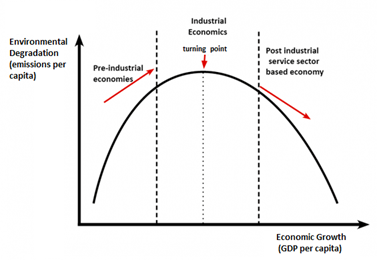

In this project I will try to find any proof of the existence of the Environmental Kuznets Curve.

In [1]:
import numpy as np
import pandas as pd

# I. Getting and cleaning data

In [2]:
# Global CO2 emissions from Carbon Dioxide Information Analysis Center (CDIAC) webpage:
global_co2 = pd.read_csv('global.1751_2014.csv')
# National CO2 emissions from Carbon Dioxide Information Analysis Center (CDIAC) webpage:
national_co2 = pd.read_csv('nation.1751_2014.csv')
# Real GDP per capita from  Angus Maddison webpage for countries:
national_gdp = pd.read_excel('mpd2018.xlsx', 'Full data')
# Real GDP per capita from  Angus Maddison webpage for regions and world:
global_gdp = pd.read_excel('mpd2018_region_data.xlsx', 'Long data')
# Global population prediction:
# popul = pd.read_excel('TotalPopulation_Compact.xlsx','Data Long Format')

I have used two variables: per capita CO2 emissions (presented in metric tons of carbon) that are taken from the Carbon Dioxide Information Analysis Center (CDIAC) webpage, and Real GDP per capita in 2011US$, that was taken from the Angus Maddison webpage. Both variables are collected on the yearly basis and considered in per capita form, as it is better for empirical analysis, what comes from the Kuznets econometric theory. Moreover, for easier analysis and comparison of the data I have transformed the values to logarithms.
The analysis will be divided in two parts:
1. Panel data of developed and developing countries, where I will look into the signs of existence of Kuznets Curve in group of particular countries.
2. Aggregated World data, where I will look into a big picture and see if there are signs of Kuznets Curve in the global perspective.

## I.I Panel Data Analysis

Here I have chosen a group of countries from both emerging and developed economies. I have collected a group of ten developing countries: 
- Brazil, Chile, China, India, Mexico, South Africa, Turkey, Venezuela, Egypt, Russia 

and ten developed countries: 
- USA, UK, Australia, Canada, Finlandia, France, Japan, Norway, Spain, Germany. 

This data covers the period of 1950-2016.

## National CO2

In [3]:
national_co2

,Nation,Year,Total CO2 emissions from fossil-fuels and cement production (thousand metric tons of C),Emissions from solid fuel consumption,Emissions from liquid fuel consumption,Emissions from gas fuel consumption,Emissions from cement production,Emissions from gas flaring,Per capita CO2 emissions (metric tons of carbon),Emissions from bunker fuels (not included in the totals)
0,"(Note: missing values denoted by ""."")",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Source: Tom Boden and Bob Andres (Oak Ridge Na...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,DOI: 10.3334/CDIAC/00001_V2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AFGHANISTAN,1949.0,4.0,4,0,0,0.0,.,.,0.0
4,AFGHANISTAN,1950.0,23.0,6,18,0,0.0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...
17230,ZIMBABWE,2010.0,2121.0,1531,481,0,109.0,0,0.15,7.0
17231,ZIMBABWE,2011.0,2608.0,1584,888,0,136.0,0,0.18,8.0
17232,ZIMBABWE,2012.0,2125.0,917,1006,0,201.0,0,0.15,9.0
17233,ZIMBABWE,2013.0,3184.0,1902,1119,0,162.0,0,0.21,9.0


In [4]:
national_co2 = national_co2.drop(['Total CO2 emissions from fossil-fuels and cement production (thousand metric tons of C)',
                                 'Emissions from solid fuel consumption', 'Emissions from liquid fuel consumption',
                                 'Emissions from gas fuel consumption', 'Emissions from cement production',
                                 'Emissions from gas flaring', 'Emissions from bunker fuels (not included in the totals)'], axis=1)

In [5]:
national_co2 = national_co2.rename(columns={"Per capita CO2 emissions (metric tons of carbon)": "co2",
                                            "Year":"year", "Nation":"country"})

In [6]:
national_co2 = national_co2.drop([0,1,2])

In [7]:
national_co2['year'] = national_co2['year'].astype(int)

In [8]:
national_co2 = national_co2[national_co2['year'] >= 1950]

In [9]:
national_co2.loc[:,'country'] = national_co2.loc[:,'country'].str.title() 
national_co2.head()

,country,year,co2
4,Afghanistan,1950,0
5,Afghanistan,1951,0
6,Afghanistan,1952,0
7,Afghanistan,1953,0
8,Afghanistan,1954,0


In [10]:
# will change some country names for simplification
c = {"China (Mainland)":'China', 'France (Including Monaco)':'France', 'United States Of America':'USA', 
     'United Kingdom':'UK', 'Russian Federation':'Russia'}
national_co2 = national_co2.replace({"country": c})

In [11]:
developing_c = ['Brazil', 'Chile', 'China', 'India', 'Mexico', 'South Africa', 'Turkey', 'Venezuela', 'Egypt', 'Russia']
developed_c = ['USA', 'UK', 'Australia', 'Canada', 'Finland', 'France', 'Japan', 'Norway', 'Spain', 'Germany']

In [12]:
developing_co2 = national_co2[national_co2['country'].isin(developing_c)]

In [13]:
developing_co2

,country,year,co2
1850,Brazil,1950,0.1
1851,Brazil,1951,0.11
1852,Brazil,1952,0.12
1853,Brazil,1953,0.12
1854,Brazil,1954,0.13
...,...,...,...
16813,Venezuela,2010,1.78
16814,Venezuela,2011,1.64
16815,Venezuela,2012,1.82
16816,Venezuela,2013,1.66


In [14]:
developing_co2['country'].value_counts()

India           65
Egypt           65
China           65
Turkey          65
South Africa    65
Venezuela       65
Mexico          65
Chile           65
Brazil          65
Russia          23
Name: country, dtype: int64

We lack some data for Russia, as before 1992 such a country did not exist. Russia was formally known as USSR and composed of more territory than today, from which some countries gained their independence. That is why I will not consider this country in further analysis, as it would be difficult to interpret data for two different territories under one name.

In [15]:
developed_co2 = national_co2[national_co2['country'].isin(developed_c)]

In [16]:
developed_co2['country'].value_counts()

Finland      65
UK           65
Norway       65
USA          65
Spain        65
Japan        65
France       65
Canada       65
Australia    65
Germany      24
Name: country, dtype: int64

Similarly to the case of Russia, Germany had different names and covered various territories during WWII. For simplification, I will also resign from this observation, for cleaner and easier analysis of the variables.

In [17]:
developed_co2.head(3)

,country,year,co2
729,Australia,1950,1.83
730,Australia,1951,1.92
731,Australia,1952,1.91


In [18]:
# drop russian federation and germany due to historic territory changes and biased data
developing_co2 = developing_co2[developing_co2['country'] != 'Russia']
developed_co2 = developed_co2[developed_co2['country'] != 'Germany']

In [19]:
developing_co2.to_csv('developing_co2.csv', index = False, header=True)
developed_co2.to_csv('developed_co2.csv', index = False, header=True)

## National GDP

In [20]:
national_gdp.head()

,countrycode,country,year,cgdppc,rgdpnapc,pop,i_cig,i_bm
0,AFG,Afghanistan,1820,NaN,NaN,3280.0,NaN,NaN
1,AFG,Afghanistan,1870,NaN,NaN,4207.0,NaN,NaN
2,AFG,Afghanistan,1913,NaN,NaN,5730.0,NaN,NaN
3,AFG,Afghanistan,1950,2392.0,2392.0,8150.0,Extrapolated,NaN
4,AFG,Afghanistan,1951,2422.0,2422.0,8284.0,Extrapolated,NaN


In [21]:
national_gdp = national_gdp.drop(['countrycode', 'rgdpnapc', 'pop', 'i_cig', 'i_bm']
                                  , axis=1)

In [22]:
national_gdp = national_gdp.rename(columns={"cgdppc": "gdp"})

In [23]:
national_gdp.dtypes

country     object
year         int64
gdp        float64
dtype: object

In [24]:
national_gdp = national_gdp[national_gdp['year'] >= 1950]

In [25]:
# create a dictionary to unify names of the countries as in the database of co2?
# Venezuela (Bolivarian Republic of) = Venezuela
# drop russia and Germany?

In [26]:
# will change some country names for simplification
c = {"Russian Federation":'Russia', 'Venezuela (Bolivarian Republic of)':'Venezuela', 'United States':'USA', 'United Kingdom':'UK'}
national_gdp = national_gdp.replace({"country": c})

In [27]:
developing_gdp = national_gdp[national_gdp['country'].isin(developing_c)]

In [28]:
developing_gdp['country'].value_counts()

India           67
Russia          67
China           67
Venezuela       67
Mexico          67
Chile           67
Egypt           67
Turkey          67
South Africa    67
Brazil          67
Name: country, dtype: int64

In [29]:
developed_gdp = national_gdp[national_gdp['country'].isin(developed_c)]

In [30]:
developed_gdp['country'].value_counts()

Finland      67
UK           67
Canada       67
Australia    67
Spain        67
Norway       67
USA          67
Japan        67
France       67
Germany      67
Name: country, dtype: int64

In [31]:
# drop russian federation and germany due to historic territory changes and biased data
developing_gdp = developing_gdp[developing_gdp['country'] != 'Russia']
developed_gdp = developed_gdp[developed_gdp['country'] != 'Germany']

In [32]:
developing_gdp.to_csv('developing_gdp.csv', index = False, header=True)
developed_gdp.to_csv('developed_gdp.csv', index = False, header=True)

## Merging CO2 and GDP

'developing_co2' has 585 rows x3 columns, while 'developing_gdp' has 603 rows × 3 columns, difference is due to the years of data collection. Co2 is 1950 till 2014 and the GDP is 1900 till 2016.
I will do inner merge to save only data that captures same period of time for both variables.

In [33]:
developing_data = pd.merge(developing_co2, developing_gdp, on=['country','year'])

In [34]:
developing_data

,country,year,co2,gdp
0,Brazil,1950,0.1,1549.0
1,Brazil,1951,0.11,1544.0
2,Brazil,1952,0.12,1632.0
3,Brazil,1953,0.12,1660.0
4,Brazil,1954,0.13,1747.0
...,...,...,...,...
580,Venezuela,2010,1.78,16161.0
581,Venezuela,2011,1.64,17746.0
582,Venezuela,2012,1.82,17752.0
583,Venezuela,2013,1.66,18795.0


In [35]:
developed_data = pd.merge(developed_co2, developed_gdp, on=['country','year'])

In [36]:
developed_data

,country,year,co2,gdp
0,Australia,1950,1.83,13542.0
1,Australia,1951,1.92,12876.0
2,Australia,1952,1.91,13235.0
3,Australia,1953,1.84,13570.0
4,Australia,1954,2.06,13912.0
...,...,...,...,...
580,USA,2010,4.69,49267.0
581,USA,2011,4.56,49675.0
582,USA,2012,4.38,50394.0
583,USA,2013,4.38,50863.0


In [38]:
developing_data.dtypes

country     object
year         int32
co2         object
gdp        float64
dtype: object

In [39]:
developing_data['co2'] = developing_data['co2'].astype(float)
developed_data['co2'] = developed_data['co2'].astype(float)

In [40]:
# For easier analysis and comparison of the data I will transform the values to logarithms
developing_data['l_co2'] = np.log(developing_data['co2']) 
developing_data['l_gdp'] = np.log(developing_data['gdp']) 

developed_data['l_co2'] = np.log(developed_data['co2']) 
developed_data['l_gdp'] = np.log(developed_data['gdp']) 

In [41]:
developing_data.to_csv('developing_data.csv', index = False, header=True)
developed_data.to_csv('developed_data.csv', index = False, header=True)

## I.II Time Series for the World Data

### Global CO2

In [42]:
global_co2.head()

,Year,Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C),Carbon emissions from gas fuel consumption,Carbon emissions from liquid fuel consumption,Carbon emissions from solid fuel consumption,Carbon emissions from cement production,Carbon emissions from gas flaring,Per capita carbon emissions (metric tons of carbon; after 1949 only)
0,Source: Tom Boden (Oak Ridge National Laboratory),Gregg Marland (Appalachian State University),and Bob Andres (Oak Ridge National Laboratory),NaN,NaN,NaN,NaN,NaN
1,1751,3,0,0.0,3.0,0.0,0.0,NaN
2,1752,3,0,0.0,3.0,0.0,0.0,NaN
3,1753,3,0,0.0,3.0,0.0,0.0,NaN
4,1754,3,0,0.0,3.0,0.0,0.0,NaN


In [43]:
global_co2 = global_co2.drop(['Carbon emissions from gas fuel consumption','Carbon emissions from liquid fuel consumption',
                 'Carbon emissions from solid fuel consumption','Carbon emissions from cement production',
                'Carbon emissions from gas flaring', 'Total carbon emissions from fossil fuel consumption and cement production (million metric tons of C)'], 
                             axis=1)

In [44]:
global_co2 = global_co2.rename(columns={"Per capita carbon emissions (metric tons of carbon; after 1949 only)": "co2", 
                                        "Year":"year"})

In [45]:
global_co2 = global_co2.drop(0)

In [46]:
global_co2.dtypes

year     object
co2     float64
dtype: object

In [47]:
global_co2['year'] = global_co2['year'].astype(str).astype(int)

In [48]:
global_co2.dtypes

year      int32
co2     float64
dtype: object

In [49]:
global_co2 = global_co2[global_co2['year'] >= 1950]

In [50]:
print(global_co2)

     year   co2
200  1950  0.65
201  1951  0.69
202  1952  0.69
203  1953  0.69
204  1954  0.69
..    ...   ...
260  2010  1.32
261  2011  1.36
262  2012  1.36
263  2013  1.36
264  2014  1.36

[65 rows x 2 columns]


In [51]:
global_co2 = global_co2.reset_index(drop=True)
global_co2

,year,co2
0,1950,0.65
1,1951,0.69
2,1952,0.69
3,1953,0.69
4,1954,0.69
...,...,...
60,2010,1.32
61,2011,1.36
62,2012,1.36
63,2013,1.36


In [52]:
global_co2.to_csv('global_co2.csv', index = False, header=True)

### Global GDP

In [53]:
global_gdp.head()

,region,region_name,year,cgdppc,rgdpnapc,pop
0,af,Africa,1870,NaN,NaN,NaN
1,af,Africa,1871,NaN,NaN,NaN
2,af,Africa,1872,NaN,NaN,NaN
3,af,Africa,1873,NaN,NaN,NaN
4,af,Africa,1874,NaN,NaN,NaN


In [54]:
global_gdp = global_gdp[global_gdp['region_name'] == 'World']

In [55]:
global_gdp = global_gdp[global_gdp['year'] >= 1950]

In [56]:
global_gdp = global_gdp.drop(['region', 'pop', 'rgdpnapc', 'pop', 'region_name'], axis=1)

In [57]:
global_gdp = global_gdp.reset_index(drop=True)

In [58]:
global_gdp.to_csv('global_gdp.csv', index = False, header=True)

### Merge Global CO2 and GDP data

In [59]:
global_data = pd.merge(global_co2, global_gdp, on='year')

In [60]:
global_data

,year,co2,cgdppc
0,1950,0.65,3277.0
1,1951,0.69,3417.0
2,1952,0.69,3512.0
3,1953,0.69,3645.0
4,1954,0.69,3671.0
...,...,...,...
60,2010,1.32,12937.0
61,2011,1.36,13587.0
62,2012,1.36,13821.0
63,2013,1.36,14038.0


In [61]:
global_data = global_data.rename(columns={"cgdppc": "gdp"})

In [62]:
# For easier analysis and comparison of the data I will transform the values to logarithms
global_data['l_co2'] = np.log(global_data['co2']) 
global_data['l_gdp'] = np.log(global_data['gdp']) 

In [63]:
global_data.to_csv('global_data.csv', index = False, header=True)

# II. Cointegration

The model of the EKC is very simple in its form, having as dependent variable a proxy for the environmental degradation and as the regressors, the proxy for the nation’s wealth and its squared value:
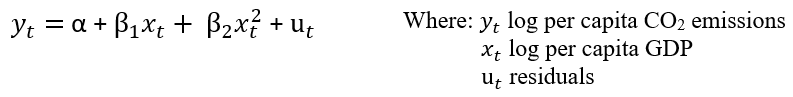

Analysis of EKC is based on the assumption that the variables taking into study are cointegrated, otherwise we could have an issue of the spurious regression. Cointegration implies a long-run relationship between the variables, by that we may understand that they will not drift too far away from each other. Finding cointegrations should allow us to obtain statistically significant regression results and correctly interpret them as a true relation. According to the theory introduced by Granger (1981), two variables are cointegrated if each one has order of integration 1 (become stationary in first difference), denoted as I(1), but trough the regression estimation (he talked about OLS as default) they produce a residual series that appears to be I(0) (stationary in levels). More precisely if y_t is I(1) and x_t is I(1), then we can say they are cointegrated, if: y_t- βx_t is of order 0 (in other words: residuals are stationary in levels) . However, if the residuals would turn out to be of order 1, this would mean that with time both y_t and x_t would aimlessly move far away from each other. We could still obtain a high R2 and the estimates based on t-statistics may seem to be significant, but they would not represent any real relation and could not be interpreted as so. That is the reason why, finding the cointegration is so crucial in the study of the EKC.

Engle–Granger two-step method for testing of cointegration:

1. Check if xt and yt are non-stationary. 
2. Check if their linear combination is stationary.

In [101]:
from matplotlib import pyplot as plt
%matplotlib inline
import statsmodels.tsa.stattools as ts 
import statsmodels.api as sm

## II.I National Data

## Developing Countries

Text(0.5, 1.0, "Developing countries' CO2 emissions 1950-2014")

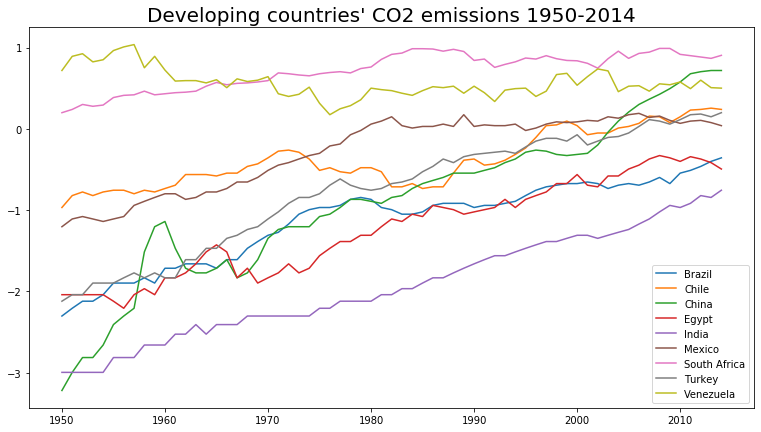

In [65]:
plt.figure(figsize=(13,7))
grouped_1 = developing_data.groupby('country')
for key, group in grouped_1:
    plt.plot(group.year, group.l_co2, label=key)
plt.legend()
plt.title("Developing countries' CO2 emissions 1950-2014", fontsize=20)

In [66]:
# subplots for each country

Text(0.5, 1.0, "Developing countries' GDP 1950-2014")

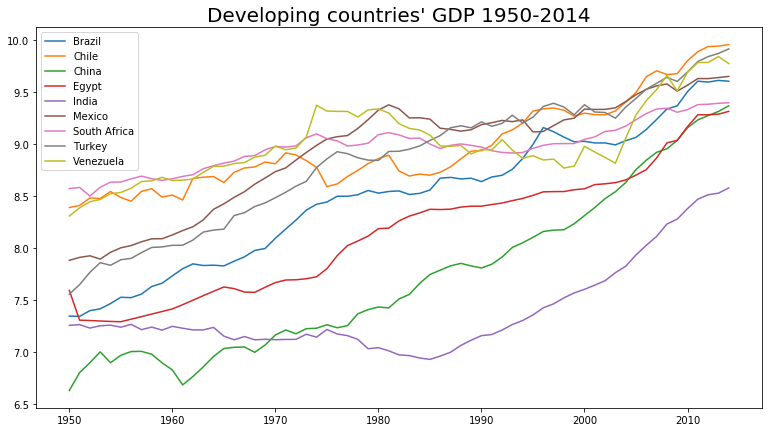

In [67]:
plt.figure(figsize=(13,7))
grouped_1 = developing_data.groupby('country')
for key, group in grouped_1:
    plt.plot(group.year, group.l_gdp, label=key)
plt.legend()
plt.title("Developing countries' GDP 1950-2014", fontsize= 20)

Both CO2 and GDP are non-stationary, as we can observe a clear upward trend in both of the variables. This means that they are of the order I(I). Now I can proceed with the ADF test of the residuals of the OLS model to see if obtained residual is of the order I(0), what would mean that the given variables are cointegrated.

In [68]:
def calc_adf(x,y):
    regr = sm.OLS(x,y).fit()
    result = ts.adfuller(regr.resid, regression = 'ctt')
    print('ADF statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('critical values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

In [69]:
grouped_1 = developing_data.groupby('country')
for key, group in grouped_1:
    print(key)
    calc_adf(group.l_gdp, group.l_co2)

Brazil
ADF statistic: -2.530279
p-value: 0.551988
critical values:
	1%: -4.583
	5%: -3.939
	10%: -3.618
Chile
ADF statistic: -4.138936
p-value: 0.020933
critical values:
	1%: -4.600
	5%: -3.947
	10%: -3.623
China
ADF statistic: -3.765672
p-value: 0.059564
critical values:
	1%: -4.565
	5%: -3.930
	10%: -3.613
Egypt
ADF statistic: -2.910849
p-value: 0.339341
critical values:
	1%: -4.562
	5%: -3.928
	10%: -3.612
India
ADF statistic: -3.236410
p-value: 0.194927
critical values:
	1%: -4.572
	5%: -3.933
	10%: -3.615
Mexico
ADF statistic: -3.881245
p-value: 0.043875
critical values:
	1%: -4.596
	5%: -3.945
	10%: -3.622
South Africa
ADF statistic: -2.821274
p-value: 0.386685
critical values:
	1%: -4.562
	5%: -3.928
	10%: -3.612
Turkey
ADF statistic: -2.659388
p-value: 0.477538
critical values:
	1%: -4.562
	5%: -3.928
	10%: -3.612
Venezuela
ADF statistic: -3.484089
p-value: 0.116992
critical values:
	1%: -4.562
	5%: -3.928
	10%: -3.612


Only Chile and Mexico have p-value smaller than my 5% significance level, therefore I am able to reject the null hypothesis that unit root does exist only for those countries. China is on the border line with p-value = 0.059564.

## Developed Countries

In [70]:
developed_data.dtypes

country     object
year         int32
co2        float64
gdp        float64
l_co2      float64
l_gdp      float64
dtype: object

Text(0.5, 1.0, "Developed countries' CO2 emissions 1950-2014")

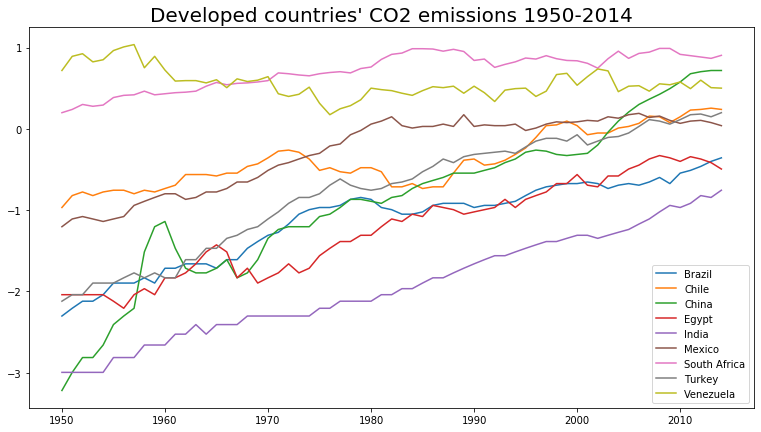

In [71]:
plt.figure(figsize=(13,7))
grouped_2 = developed_data.groupby('country')
for key, group in grouped_1:
    plt.plot(group.year, group.l_co2, label=key)
plt.legend()
plt.title("Developed countries' CO2 emissions 1950-2014", fontsize=20)

Text(0.5, 1.0, "Developed countries' GDP 1950-2014")

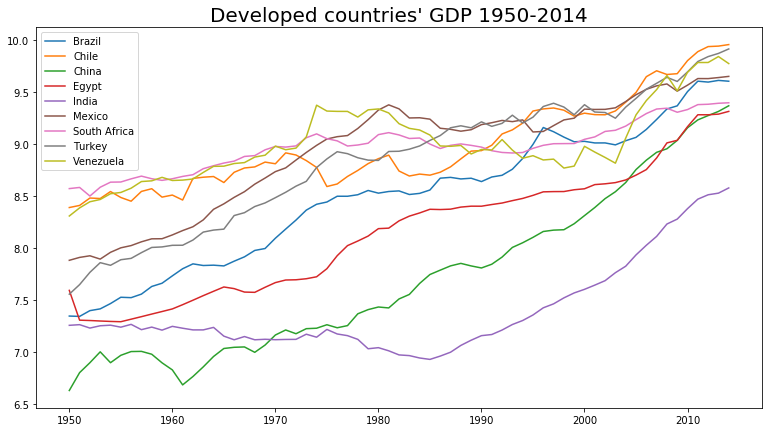

In [72]:
plt.figure(figsize=(13,7))
grouped_2 = developed_data.groupby('country')
for key, group in grouped_1:
    plt.plot(group.year, group.l_gdp, label=key)
plt.legend()
plt.title("Developed countries' GDP 1950-2014", fontsize= 20)

In [73]:
def calc_adf(x,y):
    regr = sm.OLS(x,y).fit()
    result = ts.adfuller(regr.resid, regression = 'c')
    print('ADF statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('critical values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

In [74]:
grouped_2 = developed_data.groupby('country')
for key, group in grouped_2:
    print(key)
    calc_adf(group.l_gdp, group.l_co2)

Australia
ADF statistic: -2.995324
p-value: 0.035333
critical values:
	1%: -3.537
	5%: -2.908
	10%: -2.591
Canada
ADF statistic: -3.171031
p-value: 0.021724
critical values:
	1%: -3.553
	5%: -2.915
	10%: -2.595
Finland
ADF statistic: -3.091253
p-value: 0.027207
critical values:
	1%: -3.537
	5%: -2.908
	10%: -2.591
France
ADF statistic: -0.948705
p-value: 0.771510
critical values:
	1%: -3.551
	5%: -2.914
	10%: -2.595
Japan
ADF statistic: -4.346868
p-value: 0.000368
critical values:
	1%: -3.537
	5%: -2.908
	10%: -2.591
Norway
ADF statistic: -2.101579
p-value: 0.243880
critical values:
	1%: -3.539
	5%: -2.909
	10%: -2.592
Spain
ADF statistic: -2.085350
p-value: 0.250446
critical values:
	1%: -3.544
	5%: -2.911
	10%: -2.593
UK
ADF statistic: 2.260410
p-value: 0.998929
critical values:
	1%: -3.539
	5%: -2.909
	10%: -2.592
USA
ADF statistic: -1.176795
p-value: 0.683498
critical values:
	1%: -3.542
	5%: -2.910
	10%: -2.593


In case of developed countries only four of them have passed the cointegration test: Australia, Canada, Finland, and Japan. Their p-values, resulted from the ADF test are belowe the 5% of the significance level.

## II.II World Data

Text(0.5, 1.0, "World's GDP")

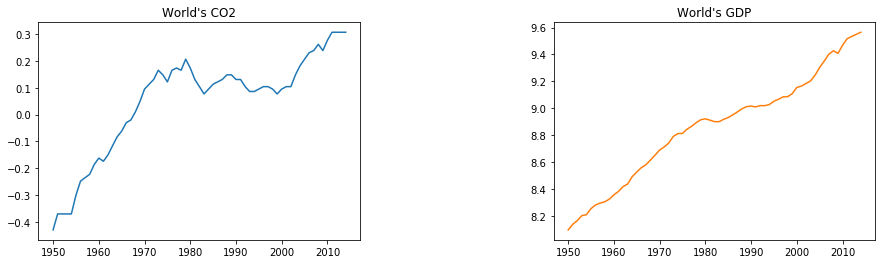

In [76]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,4))
fig.subplots_adjust(hspace=0.6, wspace=0.6)
ax1.plot(global_data['year'], global_data['l_co2'])
ax1.set_title("World's CO2")
ax2.plot(global_data['year'], global_data['l_gdp'], 'tab:orange')
ax2.set_title("World's GDP")

Here we can easily see without any additional tests that both CO2 and GDP are non-stationary variables, therefore are of the order I(I). Next I will test weather their linear regresion is stationary in residuals.

The Dickey Fuller test is one of the most popular statistical tests. It can be used to determine the presence of unit root in the series, and hence help us understand if the series is stationary or not. The null and alternate hypothesis of this test are:

Null Hypothesis: The series has a unit root (value of a =1)

Alternate Hypothesis: The series has no unit root.

In [77]:
#define function for ADF test
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [78]:
#apply adf test on the series
adf_test(global_data['l_co2'])

Results of Dickey-Fuller Test:
Test Statistic                 -3.057451
p-value                         0.029867
#Lags Used                      4.000000
Number of Observations Used    60.000000
Critical Value (1%)            -3.544369
Critical Value (5%)            -2.911073
Critical Value (10%)           -2.593190
dtype: float64


We can reject the null hypothesis at 1% of the critical value, which means that the series in fact is non stationary. Let's confirm it also for the GDP:

In [79]:
#apply adf test on the series
adf_test(global_data['l_gdp'])

Results of Dickey-Fuller Test:
Test Statistic                 -0.545037
p-value                         0.882924
#Lags Used                      1.000000
Number of Observations Used    63.000000
Critical Value (1%)            -3.538695
Critical Value (5%)            -2.908645
Critical Value (10%)           -2.591897
dtype: float64


Here as well the series is non stationary, as may be seen trough comparison of test statistics with the critical values, or the p-value.

In [80]:
regr = sm.OLS(global_data['l_gdp'], global_data['l_co2']).fit()
residual = regr.resid
result = ts.adfuller(residual, regression='c')
print('ADF statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('critical values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF statistic: -3.304789
p-value: 0.014666
critical values:
	1%: -3.544
	5%: -2.911
	10%: -2.593


We can reject the null hypothesis that the residuals of the regression above has a unit root, at the 5% significance level, as seen on the low p-value.

## III. Estimation of the Kuznets Curve

The EKC model brings lots of concerns, especially as its simplicity may result in the omitted variable bias. In order to perform valid statistics and obtain significant estimations, I should use a cointegration specific estimator, namely: Dynamic OLS (D-OLS). The D-OLS has already been proved to bring valid results in the studies of the EKC. One of the reasons is that it creates valid t-statistics (unlike for example simple OLS, which standard errors of the mentioned integrated series, would not pursue the asymptotic normal distribution). Nevertheless, many of the scientific researchers have proven that results do not differ much. Here I will perform the OLS estimation using Python and extend the study on the STATA program for more advanced statistical estimation, as D-OLS.

## III.I National Data

### Developing Countries

As was shown in the previous section, we had to exclude countries with no cointegration between both variables used in this study. Therefore, I proceed with analysis only of Chile, Mexico, and China.

In [106]:
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures 

In [107]:
# create a gdp^2
developing_data['l_gdp2'] = developing_data['l_gdp']**2

In [165]:
developing_data.head()

,country,year,co2,gdp,l_co2,l_gdp,l_gdp2
0,Brazil,1950,0.10,1549.0,-2.302585,7.345365,53.954385
1,Brazil,1951,0.11,1544.0,-2.207275,7.342132,53.906898
2,Brazil,1952,0.12,1632.0,-2.120264,7.397562,54.723917
3,Brazil,1953,0.12,1660.0,-2.120264,7.414573,54.975891
4,Brazil,1954,0.13,1747.0,-2.040221,7.465655,55.736009


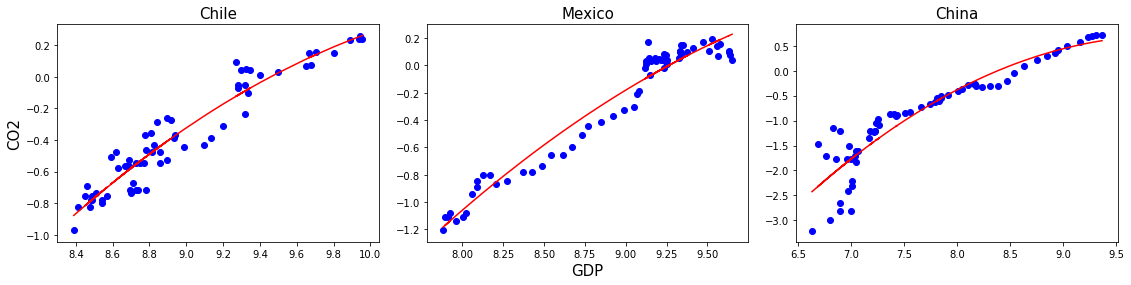

In [245]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(19,4))
fig.subplots_adjust(hspace=0.3, wspace=0.15)

d1 ={}
y1={}
X_poly1={}

grouped_1 = developing_data.groupby('country')
for key, group in grouped_1:
    
    if key=='Chile': 
        X = group.iloc[:, 5:6].values 
        y = group.iloc[:, 4].values 
        lin = LinearRegression() 
        lin.fit(X, y)
        poly = PolynomialFeatures(degree = 2) 
        X_poly = poly.fit_transform(X) 
        poly.fit(X_poly, y) 
        lin2 = LinearRegression() 
        lin2.fit(X_poly, y) 
        y_pred = lin2.predict(X_poly)
        d1["Chile"] = r2_score(y, y_pred)
        y1["Chile"] = y
        X_poly1["Chile"] = X_poly
        ax1.scatter(X, y, color = 'blue') 
        ax1.plot(X, lin2.predict(poly.fit_transform(X)), color = 'red') 
        ax1.set_title("Chile", fontsize=15)
        ax1.set_ylabel('CO2', fontsize=15)
        
    if key=='Mexico':
        X = group.iloc[:, 5:6].values 
        y = group.iloc[:, 4].values 
        lin = LinearRegression() 
        lin.fit(X, y)
        poly = PolynomialFeatures(degree = 2) 
        X_poly = poly.fit_transform(X) 
        poly.fit(X_poly, y) 
        lin2 = LinearRegression() 
        lin2.fit(X_poly, y)
        y_pred = lin2.predict(X_poly)
        d1["Mexico"] = r2_score(y, y_pred)
        y1["Mexico"] = y
        X_poly1["Mexico"] = X_poly
        ax2.scatter(X, y, color = 'blue') 
        ax2.plot(X, lin2.predict(poly.fit_transform(X)), color = 'red') 
        ax2.set_title("Mexico", fontsize=15)
        ax2.set_xlabel('GDP', fontsize=15)
        
    if key=='China':
        X = group.iloc[:, 5:6].values 
        y = group.iloc[:, 4].values 
        lin = LinearRegression() 
        lin.fit(X, y)
        poly = PolynomialFeatures(degree = 2) 
        X_poly = poly.fit_transform(X) 
        poly.fit(X_poly, y) 
        lin2 = LinearRegression() 
        lin2.fit(X_poly, y) 
        y_pred = lin2.predict(X_poly)
        d1["China"] = r2_score(y, y_pred)
        y1["China"] = y
        X_poly1["China"] = X_poly
        ax3.scatter(X, y, color = 'blue') 
        ax3.plot(X, lin2.predict(poly.fit_transform(X)), color = 'red') 
        ax3.set_title("China", fontsize=15)
        

In [211]:
for keys,values in d.items():
    print("R2 for",keys, "is equal to:",values)

R2 for Australia is equal to: 0.9799946073612795
R2 for Canada is equal to: 0.8789483090744397
R2 for Finland is equal to: 0.9616103463715246
R2 for Japan is equal to: 0.9856672712662744


In [246]:
import statsmodels.api as sm
countries=['Chile', 'Mexico', 'China']
tp_l={}
tp={}
for c in (countries):
    print(c)
    model = sm.OLS(y1[c], X_poly1[c]).fit()
    print(model.summary())
    tp_l[c] = (-model.params[1])/ (2*model.params[2])
    tp[c] = np.exp(tp_l[c])
    print('\n')

Chile
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     335.6
Date:                Mon, 08 Jun 2020   Prob (F-statistic):           5.50e-34
Time:                        16:52:16   Log-Likelihood:                 58.848
No. Observations:                  65   AIC:                            -111.7
Df Residuals:                      62   BIC:                            -105.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -22.7111      5.676     -4.001   

In [247]:
for keys,values in tp.items():
    print("The Turning Point for",keys, "is achieved at level of:",values, "GDP per capita (that is",tp_l[keys],"l_gdp)")

The Turning Point for Chile is achieved at level of: 65997.60639080363 GDP per capita (that is 11.0973737535449 l_gdp)
The Turning Point for Mexico is achieved at level of: 88746.2867625805 GDP per capita (that is 11.393536867167507 l_gdp)
The Turning Point for China is achieved at level of: 21190.89219400243 GDP per capita (that is 9.961326754859337 l_gdp)


As it could be expected non of the developing countries has reached the turning poing in its co2 - gdp curve. All coeficients for all three regression estimations seem statistically significant. R2 is also high, and thanks to the confirmed cointegartion between those variable, we may expect those results to be correct.

## Developed Countries

From the list of developed countries I will do the analysis on the Australia, Canada, Finland, and Japan, which have shown the cointegration.

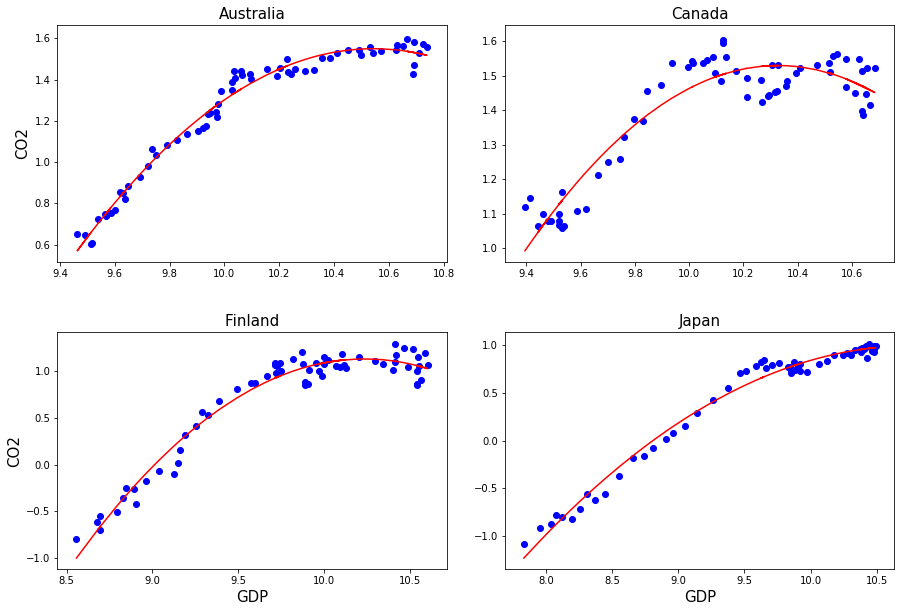

In [233]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15,10))
fig.subplots_adjust(hspace=0.3, wspace=0.15)

d2={}
y2={}
X_poly2={}

grouped_2 = developed_data.groupby('country')
for key, group in grouped_1:
    
    if key=='Australia': 
        X = group.iloc[:, 5:6].values 
        y = group.iloc[:, 4].values 
        lin = LinearRegression() 
        lin.fit(X, y)
        poly = PolynomialFeatures(degree = 2) 
        X_poly = poly.fit_transform(X) 
        poly.fit(X_poly, y) 
        lin2 = LinearRegression() 
        lin2.fit(X_poly, y) 
        y_pred = lin2.predict(X_poly)
        d2["Australia"] = r2_score(y, y_pred)
        y2["Australia"] = y
        X_poly2["Australia"] = X_poly
        ax1.scatter(X, y, color = 'blue') 
        ax1.plot(X, lin2.predict(poly.fit_transform(X)), color = 'red') 
        ax1.set_title("Australia", fontsize=15)
        ax1.set_ylabel('CO2', fontsize=15)

    if key=='Canada':
        X = group.iloc[:, 5:6].values 
        y = group.iloc[:, 4].values 
        lin = LinearRegression() 
        lin.fit(X, y)
        poly = PolynomialFeatures(degree = 2) 
        X_poly = poly.fit_transform(X) 
        poly.fit(X_poly, y) 
        lin2 = LinearRegression() 
        lin2.fit(X_poly, y) 
        y_pred = lin2.predict(X_poly)
        d2["Canada"] = r2_score(y, y_pred)
        y2["Canada"] = y
        X_poly2["Canada"] = X_poly
        ax2.scatter(X, y, color = 'blue') 
        ax2.plot(X, lin2.predict(poly.fit_transform(X)), color = 'red') 
        ax2.set_title("Canada", fontsize=15)
                
    if key=='Finland':
        X = group.iloc[:, 5:6].values 
        y = group.iloc[:, 4].values 
        lin = LinearRegression() 
        lin.fit(X, y)
        poly = PolynomialFeatures(degree = 2) 
        X_poly = poly.fit_transform(X) 
        poly.fit(X_poly, y) 
        lin2 = LinearRegression() 
        lin2.fit(X_poly, y) 
        y_pred = lin2.predict(X_poly)
        d2["Finland"] = r2_score(y, y_pred)
        y2["Finland"] = y
        X_poly2["Finland"] = X_poly
        ax3.scatter(X, y, color = 'blue') 
        ax3.plot(X, lin2.predict(poly.fit_transform(X)), color = 'red') 
        ax3.set_title("Finland", fontsize=15)
        ax3.set_xlabel('GDP', fontsize=15)
        ax3.set_ylabel('CO2', fontsize=15)
        
    if key=='Japan':
        X = group.iloc[:, 5:6].values 
        y = group.iloc[:, 4].values 
        lin = LinearRegression() 
        lin.fit(X, y)
        poly = PolynomialFeatures(degree = 2) 
        X_poly = poly.fit_transform(X) 
        poly.fit(X_poly, y) 
        lin2 = LinearRegression() 
        lin2.fit(X_poly, y) 
        y_pred = lin2.predict(X_poly)
        d2["Japan"] = r2_score(y, y_pred)
        y2["Japan"] = y
        X_poly2["Japan"] = X_poly
        ax4.scatter(X, y, color = 'blue') 
        ax4.plot(X, lin2.predict(poly.fit_transform(X)), color = 'red') 
        ax4.set_title("Japan", fontsize=15)
        ax4.set_xlabel('GDP', fontsize=15)

In [210]:
for keys,values in d2.items():
    print("R2 for",keys, "is equal to:",values)

R2 for Australia is equal to: 0.9799946073612795
R2 for Canada is equal to: 0.8789483090744397
R2 for Finland is equal to: 0.9616103463715246
R2 for Japan is equal to: 0.9856672712662744


In [241]:
import statsmodels.api as sm
countries=['Australia', 'Canada', 'Finland', 'Japan']
tp_l={}
tp={}
for c in (countries):
    print(c)
    model = sm.OLS(y2[c], X_poly2[c]).fit()
    print(model.summary())
    tp_l[c] = (-model.params[1])/ (2*model.params[2])
    tp[c] = np.exp(tp_l[c])
    print('\n')

Australia
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     1519.
Date:                Mon, 08 Jun 2020   Prob (F-statistic):           2.17e-53
Time:                        16:43:10   Log-Likelihood:                 112.56
No. Observations:                  65   AIC:                            -219.1
Df Residuals:                      62   BIC:                            -212.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -91.7852      4.128    -22.23

In [244]:
for keys,values in tp.items():
    print("The Turning Point for",keys, "is achieved at level of:",values, "GDP per capita (that is",tp_l[keys],"l_gdp)")

The Turning Point for Australia is achieved at level of: 37938.893848762105 GDP per capita (that is 10.54373208778623 l_gdp)
The Turning Point for Canada is achieved at level of: 30570.854667539686 GDP per capita (that is 10.327802372215356 l_gdp)
The Turning Point for Finland is achieved at level of: 27876.78861670396 GDP per capita (that is 10.235549672325561 l_gdp)
The Turning Point for Japan is achieved at level of: 47894.005426162745 GDP per capita (that is 10.776745627888108 l_gdp)


As the results above indicate, all three countries, except Japan, already achieved the turning point. This can be seen visualy confirmed on the graphs represented above, where levels of co2 decline with the growth of gdp. P-values indicate that all the coeficients are statistically significant. However, we should be distanced with interpreting them, as the model is very simple in its form, and may be subject to some bias.

## III.II World Data

In [249]:
# create a gdp^2
global_data['l_gdp2'] = global_data['l_gdp']**2

In [250]:
X = global_data.iloc[:, 4:5].values 
y = global_data.iloc[:, 3].values 

In [251]:
from sklearn.linear_model import LinearRegression 
lin = LinearRegression() 
  
lin.fit(X, y) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [252]:
# Fitting Polynomial Regression to the dataset 
from sklearn.preprocessing import PolynomialFeatures 
  
poly = PolynomialFeatures(degree = 2) 
X_poly = poly.fit_transform(X) 
  
poly.fit(X_poly, y) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y) 
y_pred = lin2.predict(X_poly)
print("Fit of the model by R2: ", r2_score(y, y_pred))

Fit of the model by R2:  0.9209154564413293


In [225]:
import statsmodels.api as sm
model = sm.OLS(y, X_poly).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  l_co2   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     313.8
Date:                Mon, 08 Jun 2020   Prob (F-statistic):           3.71e-33
Time:                        16:11:18   Log-Likelihood:                 94.687
No. Observations:                  65   AIC:                            -183.4
Df Residuals:                      62   BIC:                            -176.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.4292      1.126     -7.486      0.000     -10.680      -6.178
x1             1.6022      0.243      6.592      0.000       1.116       2.088
x2            -0.0744      0.013     -5.717      0.000      -0.100      -0.048
==============================================================================
Omnibus:                        1.118   Durbin-Watson:                   0.135
Prob(Omnibus):                  0.572   Jarque-Bera (JB):                1.187
Skew:                           0.268   Prob(JB):                        0.553
Kurtosis:                       2.612   Cond. No.                     1.54e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.54e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

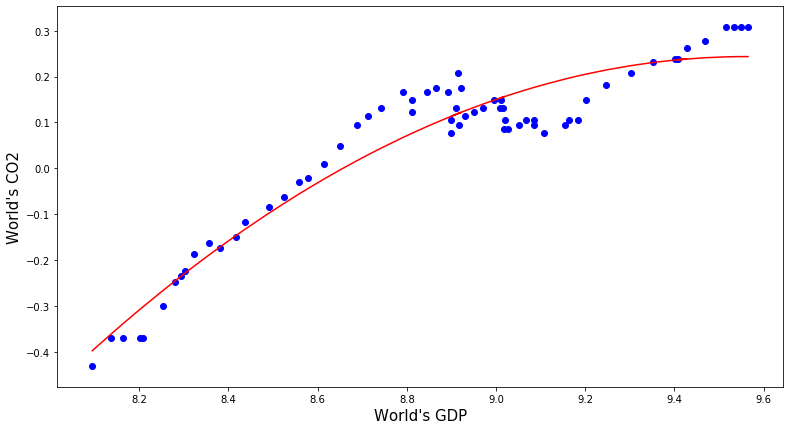

In [253]:
plt.figure(figsize=(13,7))
plt.scatter(X, y, color = 'blue')   
plt.plot(X, lin2.predict(poly.fit_transform(X)), color = 'red') 
plt.xlabel("World's GDP", fontsize=15)
plt.ylabel("World's CO2", fontsize=15)
plt.show()

In [256]:
# Calculating Turning Point:
tp_l = (-model.params[1])/ (2*model.params[2])
tp = np.exp(tp_l)
print("Turning Poing:",tp,"$","(that is",tp_l,"l_gdp)")

Turning Poing: 21190.89219400243 $ (that is 9.961326754859337 l_gdp)


It seems that globaly we have not reached yet the turning point at wich the global CO2 level will decrease. However, we apraching this point by decreasing the growth of the CO2 emissions. Thanks to various international initiatives like 'Kioto protocol' or 'Paris Agreement' we will be able soon to more efectively fight the levels of CO2 emissions, what will affect our fight with global warming and in effect change future of our planet.